In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [2]:
rcParams['figure.figsize'] = (12, 10)
df = pd.read_excel('~/Desktop/TED.xlsx')

## Part One
#### Questions (10 Marks):
1. What was the total number of comments for all the years (2 Marks)?
2. What was the average number of views for 2006 (2 Marks)?
3. What was the average length of videos in 2005 (2 Marks)?
4. Of the top 100 TED Talks, in what film year did the presentations have the highest average number of views (2 Marks)?
5. In what film year did TED Talks see the highest number of total comments (2 Marks)?

In [3]:
df.head()

,Film ID,Film Date,Publish Date,# Comments,# Views (million),Length (minutes),Speaker,Title,URL
0,1,2005-01-01,2005-03-28,3165,20,5,Ken Robinson,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...
1,7,2013-02-13,2013-05-09,3270,25,35,Jill Bolte Taylor,My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...
2,2,2005-07-07,2005-10-15,1705,45,39,Amy Cuddy,Your body language may shape who you are,https://www.ted.com/talks/amy_cuddy_your_body_...
3,3,2005-09-24,2005-12-30,2418,29,15,Simon Sinek,How great leaders inspire action,https://www.ted.com/talks/simon_sinek_how_grea...
4,4,2015-05-08,2015-06-26,1220,32,18,BrenÃ© Brown,The power of vulnerability,https://www.ted.com/talks/brene_brown_on_vulne...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Film ID            100 non-null    int64         
 1   Film Date          100 non-null    datetime64[ns]
 2   Publish Date       100 non-null    datetime64[ns]
 3   # Comments         100 non-null    int64         
 4   # Views (million)  100 non-null    int64         
 5   Length (minutes)   100 non-null    int64         
 6   Speaker            100 non-null    object        
 7   Title              100 non-null    object        
 8   URL                100 non-null    object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 7.2+ KB


In [5]:
total_comments = df['# Comments']
print(f'Q1). What was the total number of comments for all the years (2 Marks)?')
print(f'A1). Total number of comments is {total_comments}')

Q1). What was the total number of comments for all the years (2 Marks)?
A1). Total number of comments is 0     3165
1     3270
2     1705
3     2418
4     1220
      ... 
95    1993
96    4244
97    2742
98    4541
99    3083
Name: # Comments, Length: 100, dtype: int64


In [6]:
avg_views_in_2006 = df[df['Film Date'].dt.year == 2006]['# Views (million)'].mean()
print(f'Q2). What was the average number of views for 2006 (2 Marks)?')
print(f'A2). Average number of views in 2006 was {avg_views_in_2006: .4f} (in millions)')

Q2). What was the average number of views for 2006 (2 Marks)?
A2). Average number of views in 2006 was  12.3333 (in millions)


In [7]:
avg_video_length_in_2005 = df[df['Film Date'].dt.year == 2005]['Length (minutes)'].mean()
print(f'Q3). What was the average length of videos in 2005 (2 Marks)?')
print(f'A3). Average length of videos in 2005 is {avg_video_length_in_2005: .4f} minutes.')

Q3). What was the average length of videos in 2005 (2 Marks)?
A3). Average length of videos in 2005 is  22.2857 minutes.


In [8]:
avg_views_by_year = df.groupby(df['Film Date'].dt.year)['# Views (million)'].mean().sort_values(ascending=False)
print(f'Q4). Of the top 100 TED Talks, in what film year did the presentations have the highest average number of views (2 Marks)?')
print(f'A4). Descending order of average number of views in millions by year: {avg_views_by_year}')

Q4). Of the top 100 TED Talks, in what film year did the presentations have the highest average number of views (2 Marks)?
A4). Descending order of average number of views in millions by year: Film Date
2007    32.714286
2016    32.625000
2008    31.166667
2005    29.428571
2003    27.857143
2014    27.500000
2004    25.000000
2013    23.666667
2009    23.600000
2011    23.571429
2015    23.428571
2012    20.571429
2010    19.714286
2017    19.333333
2006    12.333333
Name: # Views (million), dtype: float64


In [9]:
total_comments_by_year = df.groupby(df['Film Date'].dt.year)['# Comments'].sum().sort_values(ascending=False)
print(f'Q5). In what film year did TED Talks see the highest number of total comments (2 Marks)?')
print(f'A5). Descending order of total number of comments by year: {total_comments_by_year}')

Q5). In what film year did TED Talks see the highest number of total comments (2 Marks)?
A5). Descending order of total number of comments by year: Film Date
2010    22738
2003    20292
2004    19981
2013    19677
2011    17992
2014    17924
2005    17145
2012    16958
2016    16555
2007    13505
2015    10914
2008    10514
2009    10406
2017     9881
2006     6659
Name: # Comments, dtype: int64


## Part 2
###### Insert columns “Month”, “Count.”. The Month column should contain the numbers 1-12. In the Count column, using a formula, count the number of times a month is displayed in the top 100 video film dates
###### Questions (10 Marks)
1. Use the updated data in sheet “Q1 & Q2” to insert a bar chart at the bottom of the sheet to
visualize the frequency of the months when filming takes place (4Marks).
2. In which month have the most presentations been filmed (2 Marks)?
3. In which month have the fewest presentations been filmed (2 Marks)?
4. Of the videos presented, how many were filmed in July (2 Marks)?

In [10]:
df['Month'] = df['Film Date'].dt.month
month_freq = df.groupby(df['Month'])['Film ID'].count().sort_values(ascending=False).reset_index()
month_freq.rename(columns={'Film ID': 'Frequency'}, inplace=True)

Q1. Use the updated data in sheet “Q1 & Q2” to insert a bar chart at the bottom of the sheet to visualize the frequency of the months when filming takes place. 


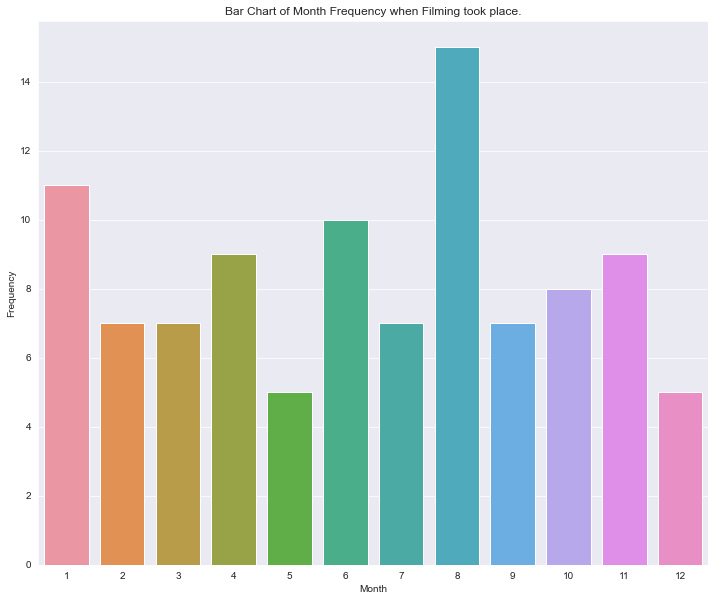

In [11]:
print(f'Q1. Use the updated data in sheet “Q1 & Q2” to insert a bar chart at the bottom of the sheet to visualize the frequency of the months when filming takes place. ')
barchart = sns.barplot(data=month_freq, x='Month', y='Frequency')
barchart.set_title('Bar Chart of Month Frequency when Filming took place.');

In [12]:
print(f'Q2). In which month have the most presentations been filmed?')
print(f'A2). The most presentation have been filmed in month {month_freq["Month"].iloc[0]} which is {month_freq["Frequency"].iloc[0]}')

Q2). In which month have the most presentations been filmed?
A2). The most presentation have been filmed in month 8 which is 15


In [13]:
print(f'Q3). In which month have the fewest presentations been filmed?')
print(f'A3). The least presentation have been filmed in month {list(month_freq["Month"].iloc[-2:])} which is {month_freq["Frequency"].iloc[-1]}')

Q3). In which month have the fewest presentations been filmed?
A3). The least presentation have been filmed in month [5, 12] which is 5


In [14]:
presentations_in_july = month_freq.loc[month_freq['Month'] == 7]['Frequency']
print(f'Q4). Of the videos presented, how many were filmed in July?')
print(f'A4). The number of videos filmed in July is {presentations_in_july.iloc[0]}')

Q4). Of the videos presented, how many were filmed in July?
A4). The number of videos filmed in July is 7


## Part 3
- Using conditional formatting, have the descriptive tag counts that are above average display with a
green background and those with below average count display with a red background.
- Manually group rows together (using copy and paste) until you have stacked the colors together as much as possible. (Hint: insert a blank row before you move one, so you do not accidentally delete
any data.) Note that although there is no right or wrong way to stack the rows, you want to stack them so that the colors tell the most compelling story.
1. Submit your excel file including the visualized table. (6 Marks).
2. How many times was “Inspiring” tagged for the top ranked video (3 Marks)
3. How many times was “OK” above average (3 Marks)?
4. How many times was “Funny” above average (3 Marks)?


In [15]:
df = pd.read_excel('~/Desktop/Ted.xlsx', sheet_name='Q3')
df.rename(columns={'Ranking': 'Tagged_Word'}, inplace=True)

In [16]:
# Preparing DataFrame to style
tag_mean = df.iloc[:, 1:].sum().sum() / df.iloc[:, 1:].size
bool_df = pd.concat([df['Tagged_Word'], (df.iloc[:, 1:] > tag_mean)], axis=1)
bool_df['Above_Avg_Cnt'] = bool_df.iloc[:, 1:].sum(axis=1)
bool_df.sort_values(ascending=False, by='Above_Avg_Cnt', inplace=True)
colors = pd.DataFrame(np.where(bool_df.iloc[:, 1:-1], 'green', 'red'), columns=[*range(1, 11)])
rest = bool_df.loc[:, ['Tagged_Word', 'Above_Avg_Cnt']]
regular_df = pd.concat([rest, df.iloc[:, 1:]], axis=1)
regular_df.reset_index(drop=True, inplace=True)
rest.reset_index(drop=True, inplace=True)
color_mapped_df = pd.concat([rest, colors], axis=1)

In [17]:
# Styling DataFrame
st_df = regular_df.style.format()
st_df.set_table_styles([
    {'selector': '.green', 'props': 'background-color: green; border: 1px solid black;'},
    {'selector': '.red', 'props': 'background-color: red; border: 1px solid black;'},
], overwrite=False)
print('Q1). Interpretation #1 \nAbove average tags are colored in green, below average in red. Rows are sorted in descending order by "Above_Avg_Cnt" column. Therefore, the rows where tagged word appears to be used above the average count the most will be at the top.')
# st_df.set_td_classes(color_mapped_df)

Q1). Interpretation #1 
Above average tags are colored in green, below average in red. Rows are sorted in descending order by "Above_Avg_Cnt" column. Therefore, the rows where tagged word appears to be used above the average count the most will be at the top.


<img src="media/colored_border.png" alt="drawing" width="700"/>

Q1). Interpretation #2 
Visualized table.


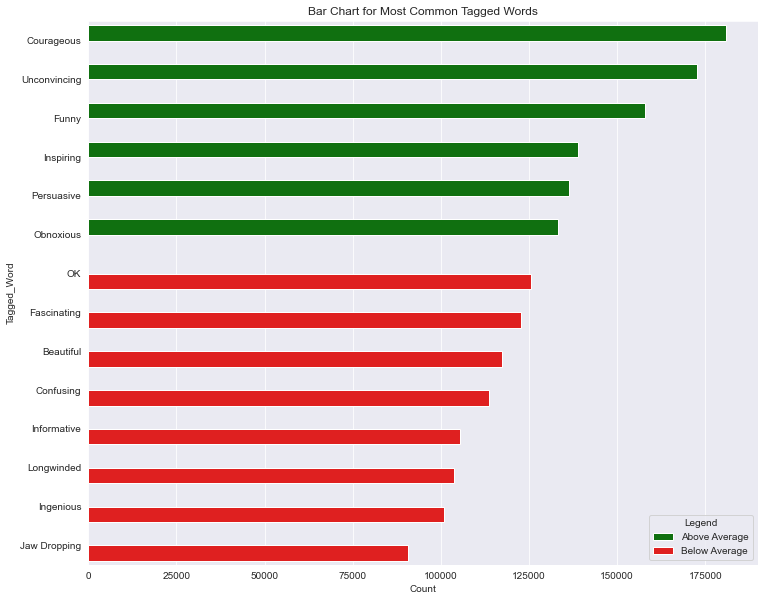

In [18]:
# Bar Chart for Most Common Tagged Words
word_cnt = pd.concat([df['Tagged_Word'], df.iloc[:, 1:].sum(axis=1)], axis=1)
word_cnt.rename(columns={0: 'Count'}, inplace=True)
word_cnt.sort_values(ascending=False, by='Count', inplace=True)
mean_count = word_cnt['Count'].mean()
word_cnt['Legend'] = ['Above Average' if (cnt > word_cnt['Count'].mean()) else 'Below Average' for cnt in word_cnt['Count']]
word_cnt.reset_index(drop=True, inplace=True)
print('Q1). Interpretation #2 \nVisualized table.')
barchart1 = sns.barplot(data=word_cnt, y='Tagged_Word', x='Count', hue='Legend', palette=['green', 'red'])
plt.title('Bar Chart for Most Common Tagged Words');

In [19]:
print(f'Q2). How many times was “Inspiring” tagged for the top ranked video.')
print(f'A2). Word “Inspiring” was tagged {df[df["Tagged_Word"] == "Inspiring"][1].iloc[0]} for the top ranked video.')

Q2). How many times was “Inspiring” tagged for the top ranked video.
A2). Word “Inspiring” was tagged 13780 for the top ranked video.


In [20]:
print(f'Q3). How many times was “OK” above average?')
print(f'A3). Word “OK” was tagged above average {regular_df[regular_df["Tagged_Word"] == "OK"]["Above_Avg_Cnt"].iloc[0]} times out of Top 10 videos.')

Q3). How many times was “OK” above average?
A3). Word “OK” was tagged above average 5 times out of Top 10 videos.


In [21]:
print(f'Q4). How many times was “Funny” above average?')
print(f'A4). Word “Funny” was tagged above average {regular_df[regular_df["Tagged_Word"] == "Funny"]["Above_Avg_Cnt"].iloc[0]} times out of Top 10 videos.')

Q4). How many times was “Funny” above average?
A4). Word “Funny” was tagged above average 7 times out of Top 10 videos.
